<a href="https://colab.research.google.com/github/veena-vijayan/TPOT_Handson/blob/master/TPOT_Handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TPOT :: Automated ML :: Handson**



> This notebook closely follows the article by Jeff Hale. The article can be viewed https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9. Kindly take a look before going through the notebook.





> We would be fitting the TPOT on the 3 datasets, namely the MNIST dataset, Mushroom dataset and Ames dataset. We fit the TPOT for 60 pipelines iteratively and for 1100 pipelines. We would be looking into the accuracy, time taken and the best fitted model for each case separately. A high level explanation of the steps involved is explained below.



In [ ]:
!pip install category_encoders
!pip install tpot

In [2]:
# import the usual stuff
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import timeit
import time
import gc
import category_encoders
from math import sqrt

# import TPOT and sklearn stuff
from tpot import TPOTClassifier
from tpot import TPOTRegressor

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer
from sklearn_pandas import CategoricalImputer

pd.options.display.max_columns = 200
pd.options.display.width = 200

%matplotlib inline
sns.set(font_scale=1.5, palette="colorblind")
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 300)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### **Accuracy Plots**

In [3]:
def TimeforEachPipes(times, datasetName, pipeline):
    timeo = np.array(times)
    df = pd.DataFrame(np.reshape(timeo, (len(timeo))))
    df= df.rename(columns={0: "Times"})
    df = df.reset_index()
    df = df.rename(columns = {"index": "Runs"})
#     print(df)

    ax = sns.barplot(x= np.arange(1, len(df)+1), y = "Times", data = df)
    ax.set(xlabel='Run # for Set of ' + str(pipeline) + ' Pipelines', ylabel='Time in Minutes')
    plt.title("TPOT Run Times for " + datasetName +  " Dataset")
    plt.show()
    

In [4]:
def AccuforEachPipes(scores, datasetName, pipeline):
    accuo = np.array(scores)
    df_acc = pd.DataFrame(np.reshape(accuo, (len(accuo))))
    df_acc= df_acc.rename(columns={0: "Accuracies"})
    df_acc = df_acc.reset_index()
    df_acc = df_acc.rename(columns = {"index": "Runs"})
#     print(df_acc)
    
    ax = sns.barplot(x= np.arange(1, len(df_acc)+1), y = "Accuracies", data = df_acc)
    ax.set(xlabel='Accuracy Score for Set of ' + str(pipeline) + ' Pipelines', ylabel='Accuracy Score')
    plt.title("TPOT Accuracy Score for " + datasetName + " Dataset")
    plt.show()

## **Dataset 1: MNIST Digit Classification**

In [5]:
# create train and test sets
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.75, test_size=0.25, random_state=34)\

tpot = TPOTClassifier(verbosity=3, 
     scoring="balanced_accuracy", 
     random_state=25, 
     periodic_checkpoint_folder="tpot_mnst_60pipe.txt", 
     n_jobs=-1, 
     generations=5, 
     population_size=10,
     early_stop = 5)




> The total numbebr of piplines is given by :: POPULATION_SIZE + GENERATIONS x OFFSPRING_SIZE,<br>
where POPULATION_SIZE is generally taken as equal to OFFSPRING_SIZE. <br>
With the default TPOT setting of 100 generations with 100 population size, TPOT will evaluate 10000 pipeline configuration before finishing. But this can take a lot of time to finish procesing.



#### **1.1** **Evaluating for 60 pipes**



The below example takes far less population and generation size to arrive at a good accuracy. Here we take a population size of 10 and generation of 5 to evaluate :: 10 + (5*10) = 60 :: 60 pipelines. We see that simply with the 60 pipeline we can arrive at a good accuracy with far less processing time.

Fitting the model 3 times using a loop. We see that each time we get different models as the best possible result. TPOT doesn’t always find the same result if you instantiate one classifier. So we fit it repeatedly like we do in the for loop in the code. It is not always necessary to get differet algorithms at all times. Different random_state also yields different result. 

In [6]:
# run three iterations and time them
times = []
winning_pipes = []
scores = []

for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_mnist_60pipes.py')


32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:
Created new folder to save periodic pipeline: tpot_mnst_60pipe.txt
Saving periodic pipeline from pareto front to tpot_mnst_60pipe.txt/pipeline_gen_1_idx_0_2020.08.02_13-24-20.py

Generation 2 - Current Pareto front scores:
Periodic pipeline was not saved, probably saved before...

Generation 3 - Current Pareto front scores:
-1	0.9763841936311138	LogisticRegression(input_matrix, LogisticRegression__C=1.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 4 - Current Pareto front scores:
-1	0.9763841936311138	LogisticRegression(input_matrix, LogisticRegression__C=1.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
Periodic pipeline was not saved, probably saved be

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:
Saving periodic pipeline from pareto front to tpot_mnst_60pipe.txt/pipeline_gen_1_idx_0_2020.08.02_13-29-25.py

Generation 2 - Current Pareto front scores:
Periodic pipeline was not saved, probably saved before...

Generation 3 - Current Pareto front scores:
-1	0.9763841936311138	LogisticRegression(input_matrix, LogisticRegression__C=1.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 4 - Current Pareto front scores:
-1	0.9763841936311138	LogisticRegression(input_matrix, LogisticRegression__C=1.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to tpot_mnst_60p

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:
Saving periodic pipeline from pareto front to tpot_mnst_60pipe.txt/pipeline_gen_1_idx_0_2020.08.02_13-34-27.py

Generation 2 - Current Pareto front scores:
Periodic pipeline was not saved, probably saved before...

Generation 3 - Current Pareto front scores:
-1	0.9763841936311138	LogisticRegression(input_matrix, LogisticRegression__C=1.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 4 - Current Pareto front scores:
-1	0.9763841936311138	LogisticRegression(input_matrix, LogisticRegression__C=1.0, LogisticRegression__dual=False, LogisticRegression__penalty=l2)
Periodic pipeline was not saved, probably saved before...
Saving periodic pipeline from pareto front to tpot_mnst_60p

In [7]:
times = [time/60 for time in times]

print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Times: [5.108140889116667, 5.027416766616667, 5.035580912849999]
Scores: [0.9853416887155039, 0.9853416887155039, 0.9853416887155039]
Winning pipelines: [Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                        criterion='friedman_mse',
                                                                        init=None,
                                                                        learning_rate=0.1,
                                                                        loss='deviance',
                                                                        max_depth=5,
                                                                        max_features=0.7000000000000001,
                                                                        max_leaf_nodes=None,
                                                       

Here we see that the models selected after each excecution of the TPOT classifier is the same. This need not be the case always.

The Run-time and Accuracies in each iteration for 60 pipelines

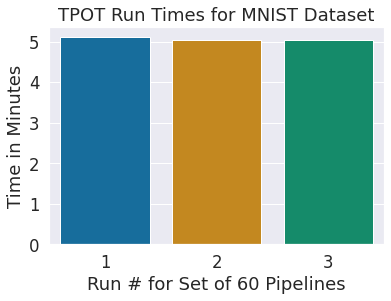

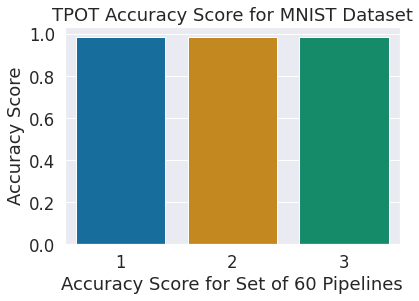

In [8]:
TimeforEachPipes(times, 'MNIST', 60)
AccuforEachPipes(scores, 'MNIST', 60)

#### **1.2** **Tuning the hyper-parameter to get a different result :: evaluating 1100 pipeline**

Evaluating for 1100 pipeline can take much longer execution time. Hence we are not going to fit it repeatedly. But we capture the time and accuracy score in this case as well.

In [9]:

tpot = TPOTClassifier(verbosity=3, 
 scoring="accuracy", 
 periodic_checkpoint_folder="tpot_mnst_1100pipe.txt", 
 n_jobs=-1, 
 generations=10, 
 population_size=100,
 early_stop = 10)

# run three iterations and time them

start_time = timeit.default_timer()
tpot.fit(X_train, y_train)


elapsed = timeit.default_timer() - start_time
tpot.export('tpot_mnist_1100pipes.py')

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 55.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 98.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:
-1	0.9799559410711828	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=5, KNeighborsClassifier__p=1, KNeighborsClassifier__weights=uniform)
Created new folder to save periodic pipeline: tpot_mnst_1100pipe.txt
Saving periodic pipeline from pareto front to tpot_mnst_

In [10]:
print('Times:', elapsed/60)
print('Scores:', tpot.score(X_test, y_test)) 
print('Winning pipelines:', tpot.fitted_pipeline_)

Times: 181.37133158275
Scores: 0.98
Winning pipelines: Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=False,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)


## **Dataset 2: Mushroom Classification**

Download the mushroom dataset from https://www.kaggle.com/mokosan/mushroom-classification/data and store it in a folder 'data'. The response variable is 'class' which is encoded p for poisonous and e for edible. 

In [11]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [12]:
X = df.reindex(columns=[x for x in df.columns.values if x != 'class'])        # separate out X
X = X.apply(LabelEncoder().fit_transform)  # encode the x columns string values as integers

y = df.reindex(columns=['class'])   # separate out y
print(y['class'].value_counts())

y = np.ravel(y)                     # flatten the y array
y = LabelEncoder().fit_transform(y) # encode y column strings as integer

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10) 

e    4208
p    3916
Name: class, dtype: int64


### **2.1** **Evaluating for 60 pipelines**

In [13]:
tpot = TPOTClassifier(verbosity=3, 
     scoring='accuracy', 
     periodic_checkpoint_folder='tpot_mushroom_60pipes.txt', 
     n_jobs=-1, 
     generations=5, 
     population_size=10,
     early_stop = 5)

In [14]:
times = []
scores = []
winning_pipes = []

# run several fits 
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_mushroom_60pipes.py')


32 operators have been imported by TPOT.



Generation 1 - Current Pareto front scores:
-1	0.9996715927750411	MLPClassifier(input_matrix, MLPClassifier__alpha=0.01, MLPClassifier__learning_rate_init=0.01)
Created new folder to save periodic pipeline: tpot_mushroom_60pipes.txt
Saving periodic pipeline from pareto front to tpot_mushroom_60pipes.txt/pipeline_gen_1_idx_0_2020.08.02_16-41-04.py
Saving periodic pipeline from pareto front to tpot_mushroom_60pipes.txt/pipeline_gen_1_idx_1_2020.08.02_16-41-04.py
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:
-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.001, MLPClassifier__learning_rate_init=0.01)
Generation 3 - Current Pareto front scores:
Saving periodic pipeline from pareto front to tpot_mushroom_60pipes.txt/pipeline_gen_3_idx_0_2020.08.02_16-41-37.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:
-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.001, MLPClassifier__learning_rate_init=0.01)
Generation 2 - Current Pareto front scores:
Saving periodic pipeline from pareto front to tpot_mushroom_60pipes.txt/pipeline_gen_2_idx_0_2020.08.02_16-43-30.py

Generation 3 - Current Pareto front scores:
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 97.

Generation 4 - Current Pareto front scores:
Periodic pipeline was not saved, probably saved before...
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 5 - Current Pareto front scores:
Periodic pipeline was not saved, probably saved before...
32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21']
expected gill-attachment, gill-spacing, stalk-surface-above-ring, population, stalk-color-above-ring, odor, gill-size, veil-type, stalk-root, bruises, ring-number, ring-type, stalk-shape, spore-print-color, veil-color, stalk-color-below-ring, cap-surface, stalk-surface-below-ring, habitat, cap-color, gill-color, cap-shape in input data
training data did not have the following fields: f16, f20, f7, f21, f10, 

In [15]:
# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Times: [2.616865296549986, 2.7705463811333173, 5.132692075899983]
Scores: [1.0, 1.0, 1.0]
Winning pipelines: [Pipeline(memory=None,
         steps=[('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.01, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), Pipeline(memory=None,
         steps=[('mlpclassifier

Here again we see that different algorithm came up in each iteration but the evaluating time have varied. We get Extra tree classifier, Random forest and Gradient boosting as the best algorithm in each iteration. Setting an algorithm to a different random state can provide different alogrithms at times.

The Run-time and Accuracies in each iteration for 60 pipelines

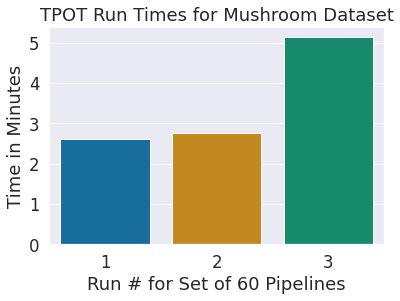

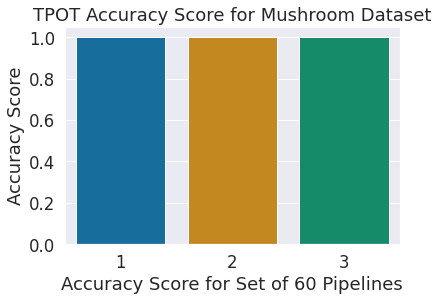

In [16]:
TimeforEachPipes(times, 'Mushroom', 60)
AccuforEachPipes(scores, 'Mushroom', 60)

### **2.2** **Tuning the hyper-parameter to get a different result :: evaluating 1100 pipeline**

In [17]:

tpot = TPOTClassifier(verbosity=3, 
 scoring="accuracy", 
 periodic_checkpoint_folder="tpot_mushroom_1100pipe.txt", 
 n_jobs=-1, 
 generations=10, 
 population_size=100)


start_time = timeit.default_timer()
tpot.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
tpot.export('tpot_mushroom_1100pipes.py')

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 No feature in X meets the variance threshold 0.00010.
_pre_test decorator: _random_mutation_operator: num_test=1 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', '

In [18]:
print('Times:', elapsed/60)
print('Scores:', tpot.score(X_test, y_test)) 
print('Winning pipelines:', tpot.fitted_pipeline_)

Times: 37.861095043300004
Scores: 1.0
Winning pipelines: Pipeline(memory=None,
         steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=1.0,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=2, missing=None,
                               n_estimators=100, n_jobs=1, nthread=1,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None,
                               subsample=0.6000000000000001, verbosity=1))],
         verbose=False)


## **Dataset 3: Ames Housing Prediction**

Download the Ames dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data and store it in a folder 'data'. The response variable is 'SalePrice' which is the price for each huse given the features. 

In [25]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
# break into X and y dataframes
X = df.reindex(columns=[x for x in df.columns.values if x != 'SalePrice'])        # separate out X
y = df.reindex(columns=['SalePrice'])   # separate out y
y = np.ravel(y)                     # flatten the y array

# make list of numeric and string columns
string_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
              'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
              'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
              'SaleType', 'SaleCondition']  # could have ordinal or nominal data
numeric_cols = list(np.setdiff1d(df.columns,string_cols)) # could still have ordinal data
numeric_cols.remove('SalePrice')

for col in X.columns:
    if (X.dtypes[col] == np.int64 or X.dtypes[col] == np.int32 or X.dtypes[col] == np.float64):
        numeric_cols.append(col)      # True integer or float columns
    
    if (X.dtypes[col] == np.object):  # Nominal and ordinal columns
        string_cols.append(col)

In [27]:
# impute missing values for string columns using sklearnpandas CategoricalImputer for string data
# s_imputer = CategoricalImputer(strategy="fixed_value", replacement="missing") 
# use above line as soon as sklearn-pandas updated
# s_imputer = CategoricalImputer()
X_string = X[string_cols]
# print(type(X_string))
# X_string = (s_imputer.fit_transform(X_string)

# or X_string = X_string.apply(s_imputer.fit_transform)

# X_string = pd.DataFrame(X_string, columns = string_cols)
X_string = X_string.fillna("missing")

In [28]:
# encode the X columns string values as integers
X_string = X_string.apply(LabelEncoder().fit_transform)  

In [29]:

# imputing missing values with most freqent values for numeric columns
n_imputer = SimpleImputer(missing_values=np.nan, copy = True, strategy = 'most_frequent') # imputing with most frequent because some of these numeric columns are ordinal

X_numeric = X[numeric_cols]
X_numeric = n_imputer.fit_transform(X_numeric)
X_numeric = pd.DataFrame(X_numeric, columns = numeric_cols)

In [31]:
# add the string and numeric dataframes back together
X = pd.concat([X_numeric, X_string], axis=1)

In [32]:
X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 55)

### **3.1** **Evaluating for 60 pipelines**

In [33]:
# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                    periodic_checkpoint_folder="tpot_ames_60pipes.txt",
                    n_jobs=-1, 
                    scoring = 'r2',
                    warm_start = True,
                    generations=5, 
                    population_size=10,
                    early_stop=5)

times = []
scores = []
winning_pipes = []

# run several fits 
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ames_60pipes.py')


# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

30 operators have been imported by TPOT.



Generation 1 - Current Pareto front scores:
-1	0.8652406867245188	RidgeCV(input_matrix)
-2	0.8706557025946097	ExtraTreesRegressor(LinearSVR(input_matrix, LinearSVR__C=0.0001, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=1.0, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=8, ExtraTreesRegressor__n_estimators=100)
Created new folder to save periodic pipeline: tpot_ames_60pipes.txt
Saving periodic pipeline from pareto front to tpot_ames_60pipes.txt/pipeline_gen_1_idx_0_2020.08.02_17-46-19.py
Saving periodic pipeline from pareto front to tpot_ames_60pipes.txt/pipeline_gen_1_idx_1_2020.08.02_17-46-19.py
Saving periodic pipeline from pareto front to tpot_ames_60pipes.txt/pipeline_gen_1_idx_2_2020.08.02_17-46-19.py
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from th

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:
-1	0.8652406867245188	RidgeCV(input_matrix)
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..

Generation 2 - Current Pareto front scores:
-1	0.8652406867245188	RidgeCV(input_matrix)
Saving periodic pipeline from pareto front to tpot_ames_60pipes.txt/pipeline_gen_2_idx_0_2020.08.02_17-48-04.py
Saving periodic pipeline from pareto front to tpot_ames_60pipes.txt/pipeline_gen_2_idx_1_2020.08.02_17-48-04.py
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 3 - Current Pareto front scores:
-1	

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:
-1	0.8712297919237713	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.15000000000000002, ExtraTreesRegressor__min_samples_leaf=4, ExtraTreesRegressor__min_samples_split=7, ExtraTreesRegressor__n_estimators=100)
-2	0.8923679904017809	RidgeCV(AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=0.5, AdaBoostRegressor__loss=square, AdaBoostRegressor__n_estimators=100))
Generation 2 - Current Pareto front scores:
-1	0.8712297919237713	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.15000000000000002, ExtraTreesRegressor__min_samples_leaf=4, ExtraTrees

The Run-time and Accuracies in each iteration for 60 pipelines

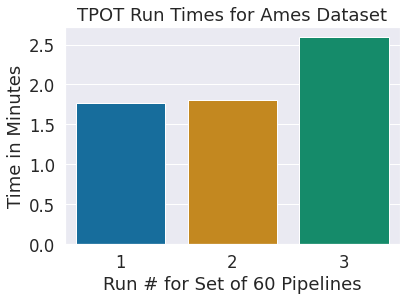

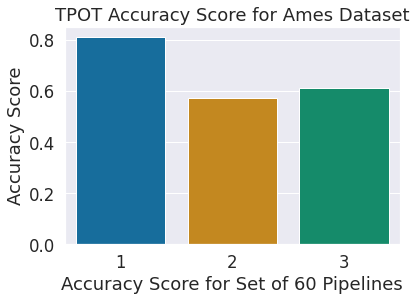

In [34]:
TimeforEachPipes(times, 'Ames', 60)
AccuforEachPipes(scores, 'Ames', 60)

### **3.2** **Tuning the hyper-parameter to get a different result :: evaluating 1100 pipeline**

In [35]:
tpot = TPOTRegressor(verbosity=3,  
                    periodic_checkpoint_folder="tpot_ames_1100pipes.txt",
                    n_jobs=-1,
                    scoring='r2',
                    warm_start=True,
                    generations=10, 
                    population_size=100,
                    early_stop=10)

start_time = timeit.default_timer()
tpot.fit(X_train, y_train)
elapsed = timeit.default_timer() - start_time
tpot.export('tpot_ames_pipeline_1100pipes.py')

30 operators have been imported by TPOT.


Skipped pipeline #43 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 84.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 [18:00:15] /workspace/src/learner.cc:723: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Stack trace:
  [bt] (0) /usr/local/lib/python3.6/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7f50a79c4cb4]
  [bt] (1) /usr/local/lib/python3.6/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::LazyInitModel()+0x5bf) [0x7f50a7a5a1ef]
  [bt] (2) /usr/local/lib/python3.6/dist-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x52) [0x7f50a79c1ac2]
  [bt] (3) /usr/lib/x86

In [36]:
print('Times:', elapsed/60)
print('Scores:', tpot.score(X_test, y_test)) 
print('Winning pipelines:', tpot.fitted_pipeline_)

Times: 128.3016207061667
Scores: 0.7747351635501233
Winning pipelines: Pipeline(memory=None,
         steps=[('stackingestimator-1',
                 StackingEstimator(estimator=ElasticNetCV(alphas=None,
                                                          copy_X=True, cv=None,
                                                          eps=0.001,
                                                          fit_intercept=True,
                                                          l1_ratio=0.6000000000000001,
                                                          max_iter=1000,
                                                          n_alphas=100,
                                                          n_jobs=None,
                                                          normalize=False,
                                                          positive=False,
                                                          precompute='auto',
                                        